### Importaci칩n de datos



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor칤a del Producto     Precio  Costo de env칤o  \
0  Asistente virtual           Electr칩nicos 164,300.00        6,900.00   
1    Mesa de comedor                Muebles 192,300.00        8,400.00   
2      Juego de mesa               Juguetes 209,600.00       15,900.00   
3         Microondas      Electrodom칠sticos 757,500.00       41,000.00   
4   Silla de oficina                Muebles 335,200.00       20,200.00   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci칩n  \
0      16/01/2021      Pedro Gomez          Bogot치             4   
1      18/05/2022  Beatriz Morales        Medell칤n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell칤n             5   

       M칠todo de pago  Cantidad de cuotas   lat    lon  
0  Tarjeta de cr칠dito                   8  4.61 -74.08  
1  Tarjeta de cr칠dito                   4  6.25 -75.56  
2  Tarjeta de cr칠dito                   1 10.40 -75.51  
3               Nequi                   1  3.44 -76.52  
4               Nequi                   1  6.25 -75.56

#1. An치lisis de facturaci칩n



## 1.1 C치lculo de facturaci칩n por tienda

In [19]:
# Diccionario de tiendas
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Crear diccionario de facturaci칩n por tienda
facturacion = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}

# Crear DataFrame
facturacion_df = pd.DataFrame(list(facturacion.items()), columns=['Tienda', 'Facturaci칩n ($ COP)'])

# Calcular facturaci칩n total de todas las tiendas
total_general = facturacion_df['Facturaci칩n ($ COP)'].sum()

# Formato de visualizaci칩n
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar tabla y total
print("FACTURACI칍N POR CADA TIENDA:")
display(facturacion_df)
print(f"\nLa facturaci칩n total de todas las tiendas es: $ {total_general:,.2f} COP")

FACTURACI칍N POR CADA TIENDA:


Tienda  Facturaci칩n ($ COP)
0  Tienda 1     1,150,880,400.00
1  Tienda 2     1,116,343,500.00
2  Tienda 3     1,098,019,600.00
3  Tienda 4     1,038,375,700.00


La facturaci칩n total de todas las tiendas es: $ 4,403,619,200.00 COP


## 1.2 Representaci칩n gr치fica de facturaci칩n por tienda

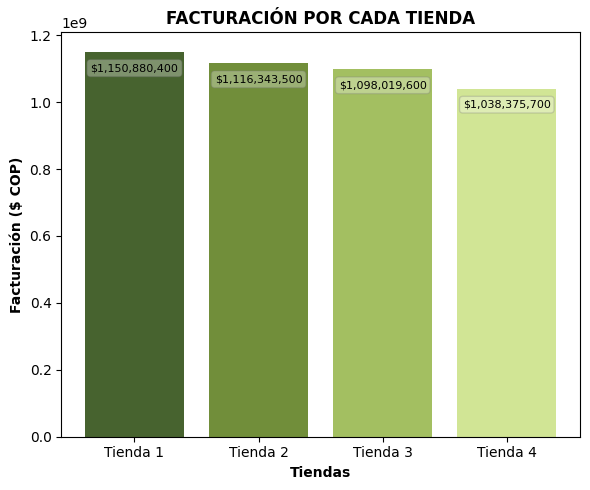

In [20]:
# Definir colores
colores = ['#47632F', '#718E3A', '#A3BF61', '#D1E595']

plt.figure(figsize=(6,5))

# Crear gr치fico de barras con colores
plt.bar(facturacion_df['Tienda'], facturacion_df['Facturaci칩n ($ COP)'], color=colores)

# Configuraci칩n del gr치fico
plt.title('FACTURACI칍N POR CADA TIENDA', fontweight='bold')
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Facturaci칩n ($ COP)', fontweight ='bold')

# A침adir etiquetas con los valores encima de cada barra
for i, valor in enumerate(facturacion_df['Facturaci칩n ($ COP)']):
    plt.text(i, valor*0.97, f"${valor:,.0f}", ha='center', va='top', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.3))

plt.tight_layout()
plt.show()

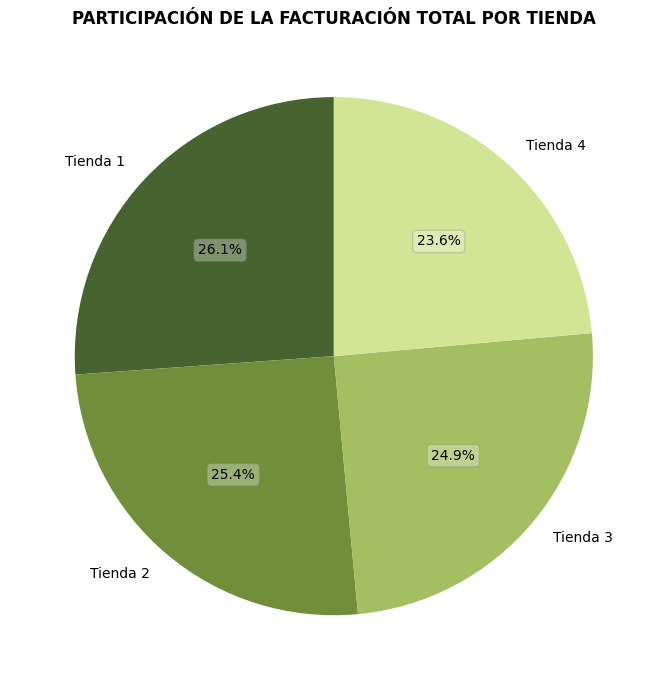

In [21]:
# Datos para el gr치fico
labels = facturacion_df['Tienda']
valores = facturacion_df['Facturaci칩n ($ COP)']

# Crear gr치fico circular
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',  # Solo mostrar porcentaje
    startangle=90,
    colors=['#47632F', '#718E3A', '#A3BF61', '#D1E595'],
    textprops={'fontsize': 10}
)

# Agregar fondo semitransparente a las etiquetas de porcentaje
for autotext in autotexts:
    autotext.set_bbox(dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.3))

# Estilo del gr치fico
plt.title('PARTICIPACI칍N DE LA FACTURACI칍N TOTAL POR TIENDA', fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Ventas por categor칤a

## 2.1 C치lculo de ventas por categor칤a por tienda

In [22]:
# Crear un diccionario vac칤o para almacenar las ventas por categor칤a por tienda
ventas_categoria = {}

# Iterar sobre las tiendas y calcular la suma de ventas por categor칤a
for nombre, df in tiendas.items():
    ventas = df.groupby('Categor칤a del Producto')['Precio'].sum()  # Agrupar por categor칤a y calcular la suma de ventas
    ventas_categoria[nombre] = ventas  # Almacenar las ventas de cada tienda en el diccionario

# Convertir el diccionario en un DataFrame, asegur치ndose de que no haya valores nulos
ventas_cat_df = pd.DataFrame(ventas_categoria).fillna(0)

# Mostrar el resultado
print("VENTAS POR CATEGOR칈A POR TIENDA:")
display(ventas_cat_df)

VENTAS POR CATEGOR칈A POR TIENDA:


Tienda 1       Tienda 2       Tienda 3  \
Categor칤a del Producto                                                 
Art칤culos para el hogar  12,698,400.00  14,746,900.00  15,060,000.00   
Deportes y diversi칩n     39,290,000.00  34,744,500.00  35,593,100.00   
Electrodom칠sticos       363,685,200.00 348,567,800.00 329,237,900.00   
Electr칩nicos            429,493,500.00 410,831,100.00 410,775,800.00   
Instrumentos musicales   91,299,000.00 104,990,300.00  77,380,900.00   
Juguetes                 17,995,700.00  15,945,400.00  19,401,100.00   
Libros                    8,784,900.00  10,091,200.00   9,498,700.00   
Muebles                 187,633,700.00 176,426,300.00 201,072,100.00   

                              Tienda 4  
Categor칤a del Producto                  
Art칤culos para el hogar  15,074,500.00  
Deportes y diversi칩n     33,350,100.00  
Electrodom칠sticos       283,260,200.00  
Electr칩nicos            409,476,100.00  
Instrumentos musicales   75,102,400.00  
Juguetes                 20,262,200.00  
Libros                    9,321,300.00  
Muebles                 192,528,900.00

## 2.2 Representaci칩n gr치fica de ventas por categor칤a por tienda

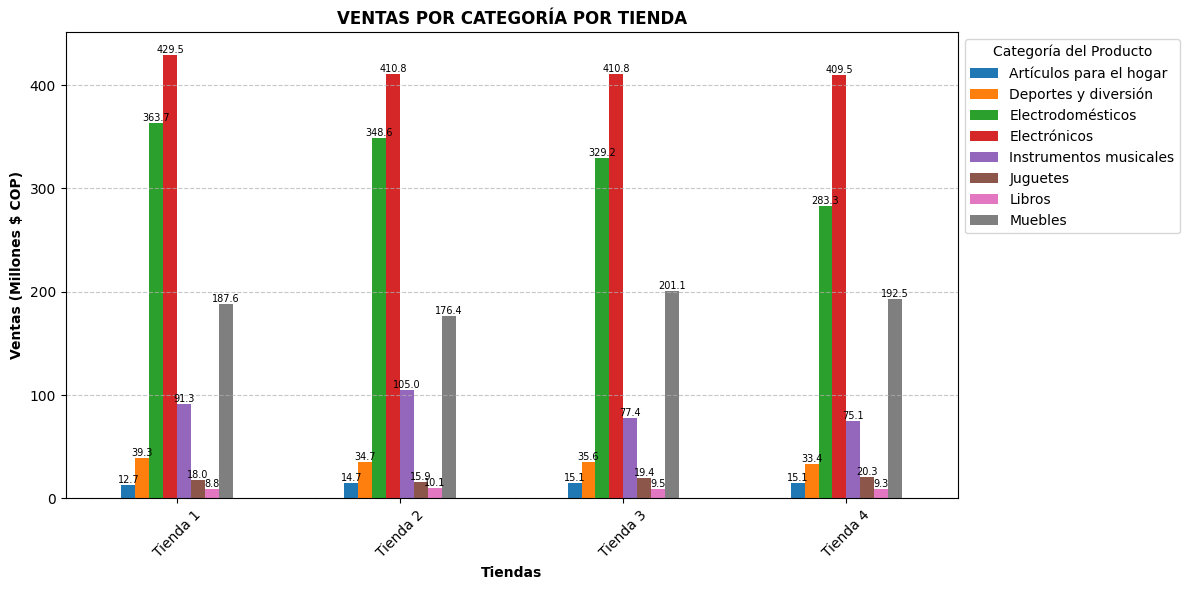

In [24]:
# Convertir el DataFrame de ventas a millones
ventas_millones = ventas_cat_df / 1_000_000

# Crear el gr치fico de barras (transponiendo para que las tiendas sean el eje X)
ax = ventas_millones.T.plot(kind='bar', figsize=(12, 6))

# Configurar t칤tulo y etiquetas
plt.title('VENTAS POR CATEGOR칈A POR TIENDA', fontweight='bold')
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Ventas (Millones $ COP)', fontweight='bold')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad

# A침adir leyenda fuera del gr치fico
plt.legend(title='Categor칤a del Producto', bbox_to_anchor=(1, 1), loc='upper left')

# Mejorar el dise침o del gr치fico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # L칤neas gu칤a horizontales

# A침adir etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',                         # Formato abreviado con 1 decimal
                    (p.get_x() + p.get_width() / 2., height), # Posici칩n centrada sobre la barra
                    ha='center', va='bottom',
                    fontsize=7, color='black', rotation=0)

# Mostrar el gr치fico
plt.show()

# 3. Calificaci칩n promedio de la tienda

## 3.1 C치lculo de calificaci칩n promedio por tienda

In [25]:
# Calcular la calificaci칩n promedio por tienda
calificaciones = {nombre: df['Calificaci칩n'].mean() for nombre, df in tiendas.items()}

# Convertir el diccionario en un DataFrame ordenado
calificaciones_df = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificaci칩n promedio'])

# Establecer el formato de visualizaci칩n para dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar el t칤tulo y el DataFrame con los resultados
print("CALIFICACI칍N PROMEDIO POR TIENDA:")
display(calificaciones_df)

CALIFICACI칍N PROMEDIO POR TIENDA:


Tienda  Calificaci칩n promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00

## 3.2 Representaci칩n gr치fica de calificaci칩n promedio por tienda

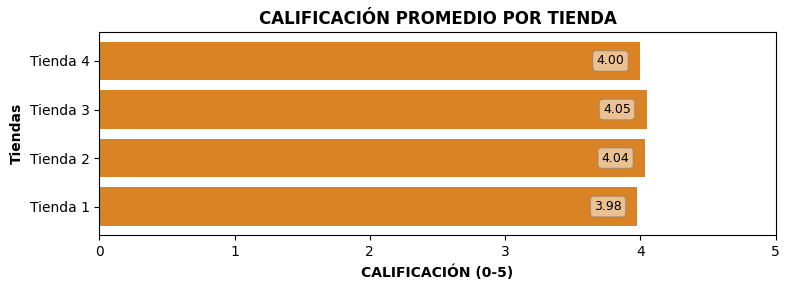

In [26]:
plt.figure(figsize=(8, 3))  # Definir el tama침o del gr치fico

# Crear gr치fico de barras horizontales con color personalizado
plt.barh(calificaciones_df['Tienda'], calificaciones_df['Calificaci칩n promedio'], color=['#D98324'])

# T칤tulos y etiquetas de los ejes
plt.title('CALIFICACI칍N PROMEDIO POR TIENDA', fontweight='bold')
plt.xlabel('CALIFICACI칍N (0-5)', fontweight='bold')
plt.ylabel('Tiendas', fontweight='bold')
plt.xlim(0, 5)  # Limitar el eje X al rango de calificaci칩n est치ndar

# A침adir etiquetas con los valores dentro de cada barra
for i, valor in enumerate(calificaciones_df['Calificaci칩n promedio']):
    plt.text(valor * 0.92, i, f"{valor:.2f}", va='center', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.5))

# Ajustar dise침o para evitar solapamientos
plt.tight_layout()

# Mostrar gr치fico
plt.show()

# 4. Productos m치s y menos vendidos

## 4.1 C치lculo de productos m치s y menos vendidos por tienda

#### 4.1.1 Productos m치s y menos vendidos por tienda

In [27]:
# Lista para almacenar los resultados
datos = []

# Recorrer cada tienda
for nombre, df in tiendas.items():
    # Agrupar los productos: cantidad vendida, ingreso total
    resumen = df.groupby("Producto").agg({
        "Producto": "count",          # Cuenta cu치ntas veces se vendi칩
        "Precio": "sum"               # Suma de todos los precios (ingreso total)
    })
    resumen.columns = ["Cantidad", "Ingreso Total"]  # Renombrar columnas

    # M치s vendidos
    mas_vendidos = resumen.sort_values("Cantidad", ascending=False).head(3)
    for producto, fila in mas_vendidos.iterrows():
        datos.append([nombre, "M치s vendido", producto, fila["Cantidad"], fila["Ingreso Total"]])

    # Menos vendidos
    menos_vendidos = resumen.sort_values("Cantidad", ascending=True).head(3)
    for producto, fila in menos_vendidos.iterrows():
        datos.append([nombre, "Menos vendido", producto, fila["Cantidad"], fila["Ingreso Total"]])

# Crear el DataFrame
ventas_df = pd.DataFrame(datos, columns=[
    "Tienda", "Tipo de Producto", "Producto", "Cantidad Vendida", "Ingresos Totales ($ COP)"])

# Crear DataFrame con los productos m치s y menos vendidos
mas_vendidos_df = ventas_df[ventas_df["Tipo de Producto"] == "M치s vendido"]
menos_vendidos_df = ventas_df[ventas_df["Tipo de Producto"] == "Menos vendido"]

# Formato decimal bonito
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar resultados
print("游닍 PRODUCTOS M츼S Y MENOS VENDIDOS POR TIENDA:")
display(ventas_df)

游닍 PRODUCTOS M츼S Y MENOS VENDIDOS POR TIENDA:


Tienda Tipo de Producto                   Producto  Cantidad Vendida  \
0   Tienda 1      M치s vendido                    Armario             60.00   
1   Tienda 1      M치s vendido              TV LED UHD 4K             60.00   
2   Tienda 1      M치s vendido                 Microondas             60.00   
3   Tienda 1    Menos vendido  Auriculares con micr칩fono             33.00   
4   Tienda 1    Menos vendido               Celular ABXY             33.00   
5   Tienda 1    Menos vendido            Olla de presi칩n             35.00   
6   Tienda 2      M치s vendido  Iniciando en programaci칩n             65.00   
7   Tienda 2      M치s vendido                 Microondas             62.00   
8   Tienda 2      M치s vendido                    Bater칤a             61.00   
9   Tienda 2    Menos vendido              Juego de mesa             32.00   
10  Tienda 2    Menos vendido                  Impresora             34.00   
11  Tienda 2    Menos vendido            Mesa de comedor             34.00   
12  Tienda 3      M치s vendido              Kit de bancas             57.00   
13  Tienda 3      M치s vendido            Mesa de comedor             56.00   
14  Tienda 3      M치s vendido                  Cama king             56.00   
15  Tienda 3    Menos vendido    Bloques de construcci칩n             35.00   
16  Tienda 3    Menos vendido               Set de vasos             36.00   
17  Tienda 3    Menos vendido                    Mochila             36.00   
18  Tienda 4      M치s vendido                   Cama box             62.00   
19  Tienda 4      M치s vendido                 Cuberter칤a             59.00   
20  Tienda 4      M치s vendido                  Cama king             56.00   
21  Tienda 4    Menos vendido         Guitarra el칠ctrica             33.00   
22  Tienda 4    Menos vendido                    Armario             34.00   
23  Tienda 4    Menos vendido          Guitarra ac칰stica             37.00   

    Ingresos Totales ($ COP)  
0              29,462,300.00  
1             142,150,200.00  
2              34,761,500.00  
3               4,730,800.00  
4              32,651,000.00  
5               2,629,300.00  
6               3,127,800.00  
7              36,192,000.00  
8              46,175,300.00  
9               5,811,900.00  
10             10,385,300.00  
11              8,637,500.00  
12             16,699,800.00  
13             14,326,100.00  
14             38,834,700.00  
15              1,237,200.00  
16              1,210,700.00  
17              3,547,000.00  
18             32,946,300.00  
19              2,649,300.00  
20             37,555,400.00  
21             25,823,100.00  
22             16,421,400.00  
23             11,257,100.00

#### 4.1.2 Productos que generaron m치s y menos ingresos por tienda

In [28]:
# Lista para almacenar los resultados
datos = []

# Recorrer cada tienda
for nombre, df in tiendas.items():
    # Agrupar los productos: cantidad vendida, ingreso total
    resumen = df.groupby("Producto").agg({
        "Producto": "count",          # Cuenta cu치ntas veces se vendi칩
        "Precio": "sum"               # Suma de todos los precios (ingreso total)
    })
    # Aplanar columnas
    resumen.columns = ["Cantidad", "Ingreso Total"]

    # Productos con m치s ingresos
    mas_ingresos = resumen.sort_values("Ingreso Total", ascending=False).head(3)
    for producto, fila in mas_ingresos.iterrows():
        datos.append([nombre, "M치s ingresos", producto, fila["Cantidad"], fila["Ingreso Total"]])

    # Productos con menos ingresos
    menos_ingresos = resumen.sort_values("Ingreso Total", ascending=True).head(3)
    for producto, fila in menos_ingresos.iterrows():
        datos.append([nombre, "Menos ingresos", producto, fila["Cantidad"], fila["Ingreso Total"]])

# Crear el DataFrame
ventas_df = pd.DataFrame(datos, columns=[
    "Tienda", "Tipo de Producto", "Producto", "Cantidad Vendida", "Ingresos Totales ($ COP)"])

# Crear DataFrame de productos con mas y menos ingresos
mas_ingresos_df = ventas_df[ventas_df["Tipo de Producto"] == "M치s ingresos"]
menos_ingresos_df = ventas_df[ventas_df["Tipo de Producto"] == "Menos ingresos"]

# Formato decimal
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar la tabla final
print("游눯 PRODUCTOS QUE GENERARON M츼S Y MENOS INGRESOS POR TIENDA:")
display(ventas_df)

游눯 PRODUCTOS QUE GENERARON M츼S Y MENOS INGRESOS POR TIENDA:


Tienda Tipo de Producto            Producto  Cantidad Vendida  \
0   Tienda 1     M치s ingresos       TV LED UHD 4K             60.00   
1   Tienda 1     M치s ingresos        Refrigerador             54.00   
2   Tienda 1     M치s ingresos           Iphone 15             49.00   
3   Tienda 1   Menos ingresos  Cuerda para saltar             40.00   
4   Tienda 1   Menos ingresos      Dinosaurio Rex             40.00   
5   Tienda 1   Menos ingresos     Cubo m치gico 8x8             44.00   
6   Tienda 2     M치s ingresos           Iphone 15             55.00   
7   Tienda 2     M치s ingresos       TV LED UHD 4K             45.00   
8   Tienda 2     M치s ingresos        Refrigerador             49.00   
9   Tienda 2   Menos ingresos     Cubo m치gico 8x8             45.00   
10  Tienda 2   Menos ingresos      Dinosaurio Rex             42.00   
11  Tienda 2   Menos ingresos  Cuerda para saltar             50.00   
12  Tienda 3     M치s ingresos        Refrigerador             50.00   
13  Tienda 3     M치s ingresos       TV LED UHD 4K             42.00   
14  Tienda 3     M치s ingresos           Iphone 15             46.00   
15  Tienda 3   Menos ingresos     Cubo m치gico 8x8             44.00   
16  Tienda 3   Menos ingresos      Dinosaurio Rex             46.00   
17  Tienda 3   Menos ingresos  Cuerda para saltar             53.00   
18  Tienda 4     M치s ingresos           Iphone 15             48.00   
19  Tienda 4     M치s ingresos       TV LED UHD 4K             40.00   
20  Tienda 4     M치s ingresos            Smart TV             54.00   
21  Tienda 4   Menos ingresos  Cuerda para saltar             43.00   
22  Tienda 4   Menos ingresos     Cubo m치gico 8x8             47.00   
23  Tienda 4   Menos ingresos      Dinosaurio Rex             47.00   

    Ingresos Totales ($ COP)  
0             142,150,200.00  
1             112,143,300.00  
2              97,902,200.00  
3                 652,800.00  
4                 688,900.00  
5                 696,900.00  
6             113,225,800.00  
7             103,375,000.00  
8              97,632,500.00  
9                 643,600.00  
10                770,300.00  
11                856,900.00  
12             99,889,700.00  
13             96,669,100.00  
14             93,225,700.00  
15                640,400.00  
16                795,600.00  
17                853,800.00  
18             96,697,500.00  
19             90,295,300.00  
20             82,790,400.00  
21                704,800.00  
22                748,400.00  
23                858,100.00

## 4.2 Representaci칩n gr치fica de productos m치s y menos vendidos por tienda

#### 4.2.1 Gr치fico productos m치s y menos vendidos por tienda

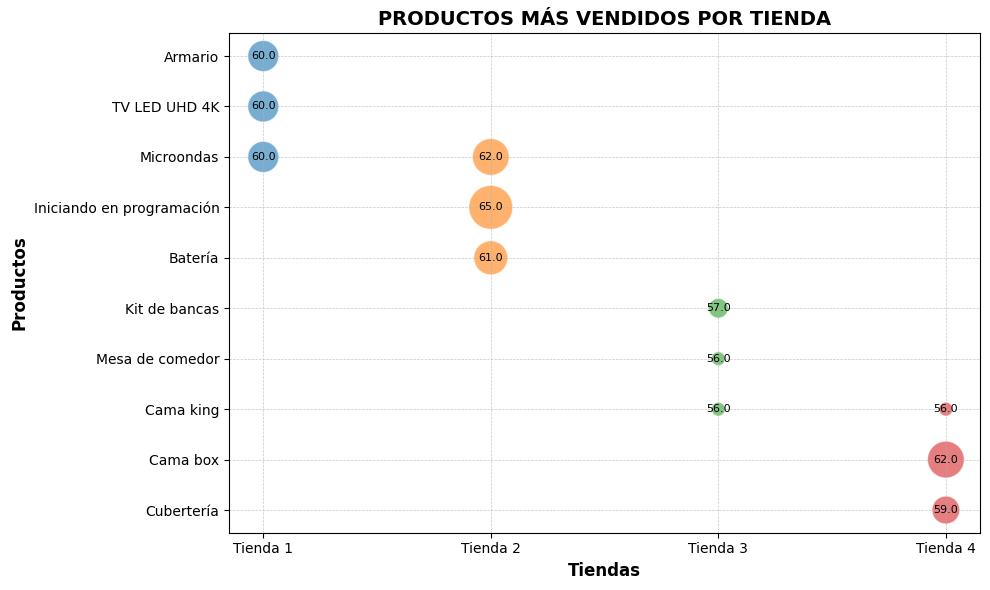

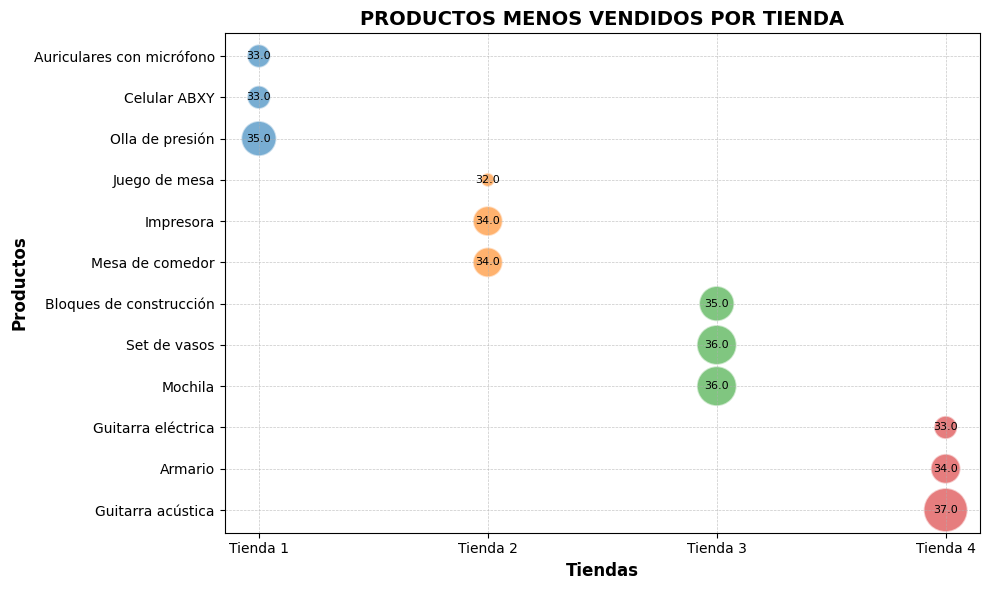

In [29]:
#PRODUCTOS M츼S VENDIDOS POR TIENDA
# Crear el gr치fico de burbuja
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mas_vendidos_df,
    x="Tienda", y="Producto", size="Cantidad Vendida", hue="Tienda",
    sizes=(100, 1000), alpha=0.6,
    legend=False
)

# A침adir el etiquetado de las cantidades
for i in range(mas_vendidos_df.shape[0]):
    plt.text(
        mas_vendidos_df["Tienda"].iloc[i], mas_vendidos_df["Producto"].iloc[i],
        str(mas_vendidos_df["Cantidad Vendida"].iloc[i]),
        horizontalalignment="center", verticalalignment="center",
        fontsize=8, color="black"
    )

# A침adir t칤tulo y etiquetas
plt.title("PRODUCTOS M츼S VENDIDOS POR TIENDA", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustar el layout para que todo se vea bien
plt.tight_layout()

# Mostrar el gr치fico
plt.show()

#PRODUCTOS MENOS VENDIDOS POR TIENDA
# Crear el gr치fico de burbuja
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=menos_vendidos_df,
    x="Tienda", y="Producto", size="Cantidad Vendida", hue="Tienda",
    sizes=(100, 1000), alpha=0.6,
    legend=False
)

# A침adir el etiquetado de las cantidades
for i in range(menos_vendidos_df.shape[0]):
    plt.text(
        menos_vendidos_df["Tienda"].iloc[i], menos_vendidos_df["Producto"].iloc[i],
        str(menos_vendidos_df["Cantidad Vendida"].iloc[i]),
        horizontalalignment="center", verticalalignment="center",
        fontsize=8, color="black"
    )

# A침adir t칤tulo y etiquetas
plt.title("PRODUCTOS MENOS VENDIDOS POR TIENDA", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gr치fico
plt.show()

#### 4.2.2 Gr치fico de productos que generaron m치s y menos ingresos por tienda

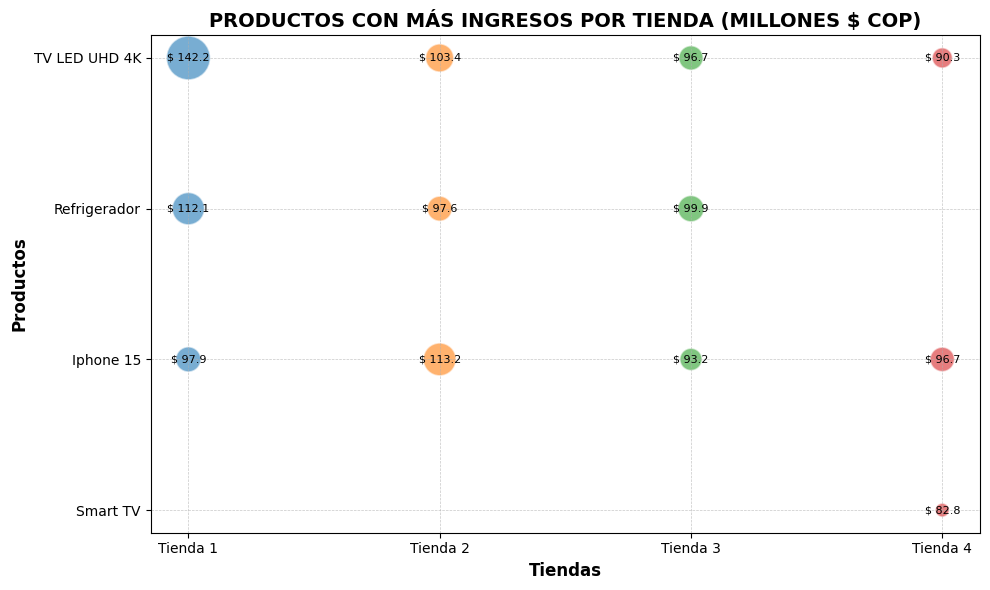

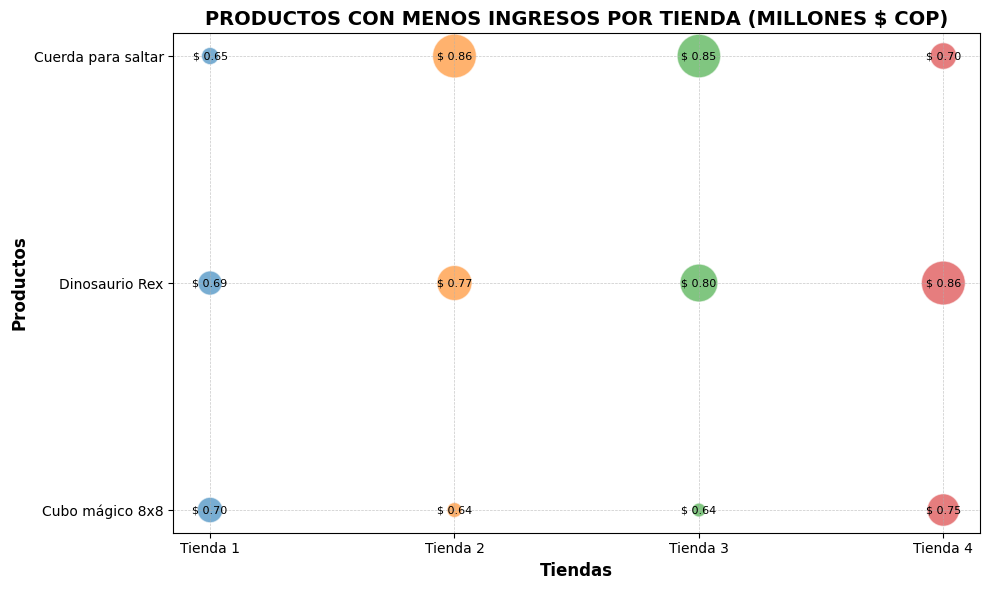

In [30]:
#PRODUCTOS QUE GENERARON M츼S INGRESOS POR TIENDA
# Copia del DataFrame y escala a millones con 3 cifras decimales
mas_ingresos_df_plot = mas_ingresos_df.copy()
mas_ingresos_df_plot["Ingreso Millones"] = (mas_ingresos_df_plot["Ingresos Totales ($ COP)"] / 1_000_000).round(3)

# Gr치fico de burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mas_ingresos_df_plot,
    x="Tienda", y="Producto", size="Ingreso Millones", hue="Tienda",
    sizes=(100, 1000), alpha=0.6, legend=False
)

# Etiquetado de ingresos en millones
for i in range(mas_ingresos_df_plot.shape[0]):
    plt.text(
        mas_ingresos_df_plot["Tienda"].iloc[i],
        mas_ingresos_df_plot["Producto"].iloc[i],
        f"$ {mas_ingresos_df_plot['Ingreso Millones'].iloc[i]:,.1f}",
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=8,
        color="black"
    )

# T칤tulo y etiquetas
plt.title("PRODUCTOS CON M츼S INGRESOS POR TIENDA (MILLONES $ COP)", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#PRODUCTOS QUE GENERARON MENOS INGRESOS POR TIENDA
# Copia del DataFrame y escala a millones con 3 cifras decimales
menos_ingresos_df_plot = menos_ingresos_df.copy()
menos_ingresos_df_plot["Ingreso Millones"] = (menos_ingresos_df_plot["Ingresos Totales ($ COP)"] / 1_000_000).round(3)

# Gr치fico de burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=menos_ingresos_df_plot,
    x="Tienda", y="Producto", size="Ingreso Millones", hue="Tienda",
    sizes=(100, 1000), alpha=0.6, legend=False
)

# Etiquetado de ingresos en millones
for i in range(menos_ingresos_df_plot.shape[0]):
    plt.text(
        menos_ingresos_df_plot["Tienda"].iloc[i],
        menos_ingresos_df_plot["Producto"].iloc[i],
        f"$ {menos_ingresos_df_plot['Ingreso Millones'].iloc[i]:,.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=8,
        color="black"
    )

# T칤tulo y etiquetas
plt.title("PRODUCTOS CON MENOS INGRESOS POR TIENDA (MILLONES $ COP)", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12, fontweight='bold')
plt.ylabel("Productos", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Env칤o promedio por tienda

## 5.1 C치lculo del costo de env칤o promedio por tienda

In [31]:
# Calcular el costo de env칤o promedio por tienda
envio_promedio = {nombre: df['Costo de env칤o'].mean() for nombre, df in tiendas.items()}

# Convertir el diccionario en un DataFrame legible
envio_prom_df = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Costo Env칤o Promedio ($ COP)'])

# Establecer el formato num칠rico para mostrar dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar el t칤tulo y la tabla con los resultados
print("COSTO DE ENV칈O PROMEDIO POR TIENDA:")
display(envio_prom_df)

COSTO DE ENV칈O PROMEDIO POR TIENDA:


Tienda  Costo Env칤o Promedio ($ COP)
0  Tienda 1                     26,018.61
1  Tienda 2                     25,216.24
2  Tienda 3                     24,805.68
3  Tienda 4                     23,459.46

## 5.2 Representaci칩n gr치fica del costo de env칤o promedio por tienda

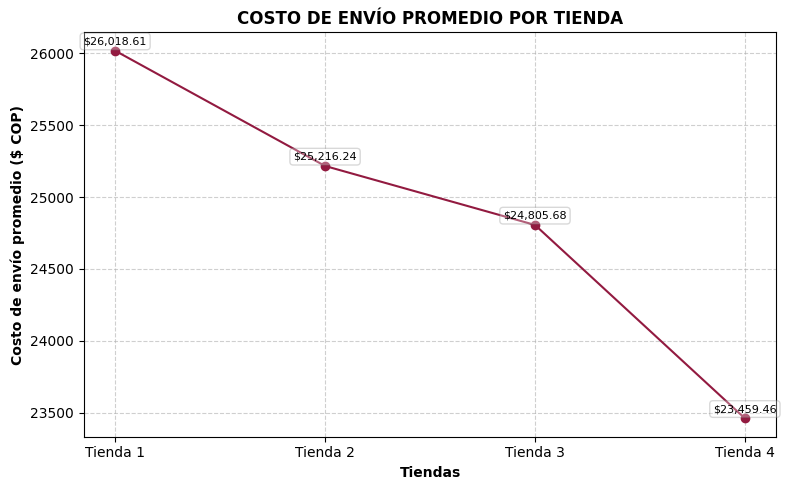

In [33]:
# Crear gr치fico de l칤nea con tama침o personalizado
plt.figure(figsize=(8, 5))
plt.plot(envio_prom_df['Tienda'], envio_prom_df['Costo Env칤o Promedio ($ COP)'],
         marker='o', linestyle='-', color='#921A40')  # L칤nea con puntos marcados

# Agregar t칤tulo y etiquetas a los ejes
plt.title('COSTO DE ENV칈O PROMEDIO POR TIENDA', fontweight='bold')
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Costo de env칤o promedio ($ COP)', fontweight='bold')

# A침adir l칤neas de cuadr칤cula
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el valor num칠rico encima de cada punto de la l칤nea
for i, row in envio_prom_df.iterrows():
    plt.text(row['Tienda'], row['Costo Env칤o Promedio ($ COP)'] + 30,
             f"${row['Costo Env칤o Promedio ($ COP)']:,.2f}",
             ha='center', va='bottom', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                       edgecolor='gray', alpha=0.3))

# Ajustar el dise침o para evitar solapamientos y mostrar el gr치fico
plt.tight_layout()
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#A4B465'>

# **<font color="#000000"> INFORME </font>**
</td>
</tr>
</table>

## **INTRODUCCI칍N**

El presente informe tiene como objetivo asesorar al Sr. Juan en la toma de una decisi칩n respecto  a qu칠 tienda de su cadena Alura Store deber칤a vender para liberar capital e iniciar un nuevo emprendimiento. Para ello, se ha realizado un an치lisis basado en cinco criterios clave:

- Los ingresos totales de las tiendas
- Las categor칤as de productos m치s y menos vendidas
- Las calificaciones promedio de los clientes por tienda
- Los productos m치s y menos vendidos
- El coste de env칤o promedio para cada tienda

---

## **DESARROLLO**

### 1. Ingresos totales de las tiendas:
- **Ventaja:** La **Tienda 1** lidera en ingresos globales con $1.150.880.400,00 COP.

- **Desventaja:** La **Tienda 4** genera los menores ingresos globales con $1.038.375.700,00 COP.


### 2. Categor칤as de productos m치s y menos vendidas:
Entre las categor칤as de productos m치s vendidas se identificaron los electr칩nicos, electrodom칠sticos y muebles.  
En contraste, entre las menos vendidas se encuentran los art칤culos para el hogar, libros y juguetes.

- **Ventaja:** Las **Tiendas 1 y 2** lideran en ventas de las categor칤as m치s fuertes (Electrodom칠sticos y Electr칩nicos).  
- **Desventaja:** La **Tienda 4** cuenta con los menores ingresos en Electrodom칠sticos y Electr칩nicos comparado con otras tiendas, afectando su facturaci칩n global.


### 3. Calificaciones promedio de los clientes por tienda:
- **Ventaja:** La **Tienda 3** obtuvo la mejor percepci칩n por parte de los clientes.  
- **Desventaja:** La **Tienda 1**, pese a ser la m치s rentable, tiene la m치s baja calificaci칩n de satisfacci칩n.


### 4. Productos m치s y menos vendidos:
Entre los productos m치s vendidos destacan la TV LED UHD 4K, iPhone 15 y Refrigerador.  
Por el contrario, entre los menos vendidos figuran la cuerda para saltar, Dinosaurio Rex y Cubo m치gico 8x8.

- **Ventaja:** La **Tienda 1** lidera con los productos de mayor ingreso.  
- **Desventaja:** En la **Tienda 4**, todos sus productos top generan menos ingresos que los mismos productos en otras tiendas.


### 5. Coste de env칤o promedio para cada tienda:
- **Ventaja:** La **Tienda 4** cuenta con una log칤stica eficiente y m치s econ칩mica.  
- **Desventaja:** La **Tienda 1** tiene el costo log칤stico m치s elevado.

---

## **CONCLUSI칍N**

Tras analizar los datos operativos, comerciales y de experiencia del cliente se extrae las siguientes conclusiones clave:

- **Tienda 1** se posiciona como la m치s rentable del grupo, con el mayor volumen de ingresos y excelente desempe침o en productos de alto valor. No obstante, presenta la calificaci칩n promedio m치s baja por parte de los clientes, lo cual representa una oportunidad de mejora en la experiencia del consumidor.

- **Tiendas 2 y 3** reflejan un equilibrio saludable entre facturaci칩n, reputaci칩n y diversidad de ventas. Ambas mantienen buenas calificaciones, niveles de ingreso consistentes y un buen posicionamiento en categor칤as clave, consolid치ndose como unidades comerciales estables y con potencial de crecimiento.

- **Tienda 4**, en contraste, es la menos eficiente dentro de la cadena Alura Store. Si bien destaca por ofrecer el menor costo de env칤o y una calificaci칩n aceptable, su facturaci칩n es la m치s baja, su rendimiento en las categor칤as m치s vendidas es inferior y los productos con mejor rotaci칩n generan ingresos significativamente menores en comparaci칩n con las dem치s tiendas.

---

## **RECOMENDACI칍N**

Se recomienda al Sr. Juan vender la **Tienda 4**, ya que representa la menor rentabilidad y el menor aporte estrat칠gico al negocio. Esta decisi칩n permitir치 liberar recursos con un impacto m칤nimo en la operaci칩n general, facilitando as칤 el inicio de su nuevo emprendimiento.
